In [1]:
sc.install_pypi_package("pandas==1.2.2")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1649231898120_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [2]:
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")

sc.list_packages()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


absl-py (0.12.0)
astor (0.8.0)
astunparse (1.6.3)
aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
bleach (3.3.0)
boto (2.49.0)
cachetools (4.1.1)
certifi (2020.12.5)
chardet (4.0.0)
click (7.1.2)
cryptography (3.2.1)
cycler (0.11.0)
docutils (0.14)
flatbuffers (1.12)
funcsigs (1.0.2)
gast (0.4.0)
google-auth (1.23.0)
google-auth-oauthlib (0.4.2)
google-pasta (0.2.0)
grpcio (1.36.1)
h5py (2.10.0)
html5lib (1.1)
idna (2.10)
importlib-metadata (2.0.0)
jmespath (0.10.0)
joblib (1.0.1)
Keras-Applications (1.0.8)
Keras-Preprocessing (1.1.2)
kiwisolver (1.4.2)
lockfile (0.11.0)
lxml (4.6.2)
Markdown (3.3.4)
matplotlib (3.1.1)
mysqlclient (1.4.2)
nltk (3.5)
nose (1.3.4)
numpy (1.16.5)
oauthlib (3.1.0)
opt-einsum (2.3.2)
packaging (20.9)
pandas (1.2.2)
pip (9.0.1)
protobuf (3.15.6)
py-dateutil (2.2)
pyasn1 (0.4.8)
pyasn1-modules (0.2.8)
pyparsing (3.0.7)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.1)
PyYAML (5.4.1)
regex (2021.3.1

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
from pyspark.sql.functions import col
import pyspark.sql.functions
from pyspark.sql.types import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load data into Dataframe

In [7]:
df = spark.read.format("parquet")\
    .option("header","true")\
    .option("inferschema","true")\
    .load("s3://mlprojectg23fan5/combined_data/*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Output from printSchema()**

In [8]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- FL_DATE: timestamp (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: double (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: double (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: d

# Display the Data Dimensions

In [9]:

print((df.count(), len(df.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(61556964, 27)

**Number of columns**

In [10]:
print("Number of Columns", len(df.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Columns 27

# Columns with None or Null Values

In [11]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+
|FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+
|      0|         0|                0|     0| 

In [12]:
dict = {col:df.filter(df[col].isNull()).count() for col in df.columns}
dict

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'FL_DATE': 0, 'OP_CARRIER': 0, 'OP_CARRIER_FL_NUM': 0, 'ORIGIN': 0, 'DEST': 0, 'CRS_DEP_TIME': 1, 'DEP_TIME': 935723, 'DEP_DELAY': 940675, 'TAXI_OUT': 963901, 'WHEELS_OFF': 963896, 'WHEELS_ON': 997016, 'TAXI_IN': 997015, 'CRS_ARR_TIME': 2, 'ARR_TIME': 997015, 'ARR_DELAY': 1121351, 'CANCELLED': 0, 'CANCELLATION_CODE': 60583755, 'DIVERTED': 0, 'CRS_ELAPSED_TIME': 60, 'ACTUAL_ELAPSED_TIME': 1118754, 'AIR_TIME': 1118753, 'DISTANCE': 0, 'CARRIER_DELAY': 50166224, 'WEATHER_DELAY': 50166224, 'NAS_DELAY': 50166224, 'SECURITY_DELAY': 50166224, 'LATE_AIRCRAFT_DELAY': 50166224}

In [13]:
df.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+
|            FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+
|2015-01-0

# Analysis Based on Time-Related Columns. 

In [14]:
df.select("CRS_DEP_TIME","ARR_TIME","DEP_TIME","AIR_TIME","CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME").describe().show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+
|summary|     CRS_DEP_TIME|          ARR_TIME|          DEP_TIME|          AIR_TIME| CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|
+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+
|  count|         61556963|          60559949|          60621241|          60438211|         61556904|           60438210|
|   mean| 1327.20258853576|1479.3368845637567|  1333.14107175734|109.77697422248319| 136.956422987095|  132.8766195755963|
| stddev|474.8935017000133| 515.0970293525357|487.48778347075887| 70.67954521240085|73.37060226293455|  72.84033473423015|
|    min|              1.0|               1.0|               1.0|               0.0|            -99.0|               11.0|
|    max|           2359.0|            2400.0|            2400.0|             723.0|           1865.0|              799.0|
+-------+-------

# Simple Data Pre-processing

In [15]:
df0 = spark.read.format("parquet")\
    .option("header","true")\
    .option("inferschema","true")\
    .load("s3://vitaproject23/cleandata/")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
df0.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------+------+----+------------+---------+--------+----------+---------+-------+------------+---------+----------------+-------------------+--------+--------+-----+-------+----+-------------+
|            FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_DELAY|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|MONTH|WEEKDAY|YEAR|FLIGHT_STATUS|
+-------------------+----------+------+----+------------+---------+--------+----------+---------+-------+------------+---------+----------------+-------------------+--------+--------+-----+-------+----+-------------+
|2018-11-25 00:00:00|ExpressJet|   SAV| ORD|           2|   1246.0|    15.0|         2|        2|   11.0|           3|   1241.0|           148.0|              143.0|   117.0|   773.0|   11|      1|2018|            1|
|2018-11-25 00:00:00|ExpressJet|   CLE| BOS|           2|     40.0|    27.0|         2|        2|    7.0|           2|     59.0|    

In [17]:
df0.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- WEEKDAY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- FLIGHT_STATUS: integer (nullable = true)

In [18]:
df1= df0[['OP_CARRIER','ORIGIN','DEST','CRS_DEP_TIME',
 'DEP_DELAY','CRS_ARR_TIME','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','ARR_DELAY']]


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
df1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+------+----+------------+---------+------------+----------------+-------------------+---------+
|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_DELAY|CRS_ARR_TIME|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|ARR_DELAY|
+----------+------+----+------------+---------+------------+----------------+-------------------+---------+
|ExpressJet|   SAV| ORD|           2|   1246.0|           3|           148.0|              143.0|   1241.0|
|ExpressJet|   CLE| BOS|           2|     40.0|           2|           105.0|              124.0|     59.0|
|ExpressJet|   BTR| IAH|           1|    -10.0|           1|            80.0|               73.0|    -17.0|
|ExpressJet|   IAH| OMA|           1|     -5.0|           2|           140.0|              132.0|    -13.0|
|ExpressJet|   IAH| TUL|           1|      0.0|           2|            95.0|               90.0|     -5.0|
+----------+------+----+------------+---------+------------+----------------+-------------------+---------+
only showing top 5 rows

 **DESTINATION AIRPORT**

In [20]:
df2 = df1[["DEST"]]
df2.drop_duplicates().count()  

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

377

### *Number of Airports

In [21]:
df2.distinct().count()
print("Number of Airports:",df2.distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Airports: 377

### The Total Number Of Trips.

In [49]:
df2 = df1.select("OP_CARRIER","DEST","ORIGIN") \
            .groupby("OP_CARRIER","DEST","ORIGIN").count() \
            .limit(15)
df2.show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+----+------+-----+
|        OP_CARRIER|DEST|ORIGIN|count|
+------------------+----+------+-----+
|  SkyWest Airlines| SLC|   BIL|11837|
|Southwest Airlines| MCO|   AUS| 5992|
|      Mesa Airline| AUS|   ORD| 1669|
|      Mesa Airline| ONT|   PHX| 1789|
|Southwest Airlines| BOS|   PHX|  701|
|  SkyWest Airlines| MSP|   IND|  705|
|        ExpressJet| MCO|   GRR|   38|
|  SkyWest Airlines| IAD|   SAT|  753|
|        ExpressJet| LEX|   GNV|    1|
|   Comair Airlines| JFK|   BUF| 2131|
|   Alaska Airlines| DEN|   SEA|14449|
|   Alaska Airlines| CDV|   YAK| 3503|
|        ExpressJet| ALB|   ORD| 1736|
|        ExpressJet| ATL|   BUF|   66|
|   Alaska Airlines| SAN|   SLC| 1257|
+------------------+----+------+-----+

In [50]:
tntdf=df2.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

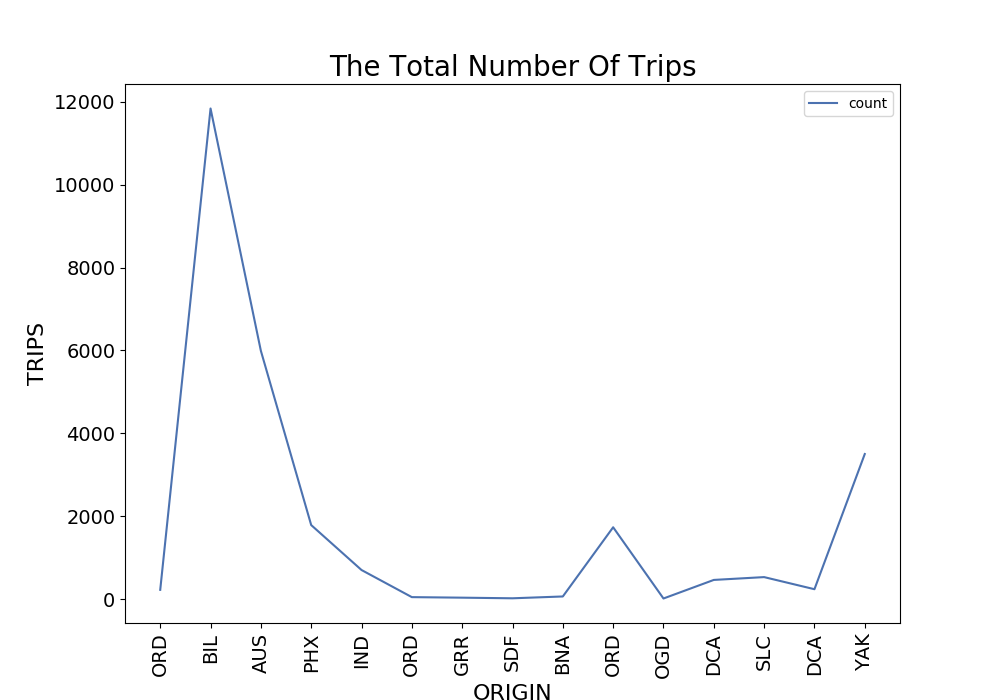

In [107]:
plt.rcParams['figure.figsize'] = [10, 7]
tntdf.plot()
plt.title('The Total Number Of Trips', fontsize=20)
plt.xlabel('ORIGIN', fontsize=16)
plt.ylabel('TRIPS', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
import numpy as np
xpos = np.arange(len(tntdf.ORIGIN))
plt.xticks(xpos,tntdf['ORIGIN'],rotation = 90)
plt.show();
%matplot plt

## Flight routes are greater than "1000" miles in distance.

In [23]:
df0.select("OP_CARRIER","DEP_DELAY",'ARR_DELAY','ORIGIN','DEST',"DISTANCE").filter("DISTANCE > 1000").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+---------+---------+------+----+--------+
|  OP_CARRIER|DEP_DELAY|ARR_DELAY|ORIGIN|DEST|DISTANCE|
+------------+---------+---------+------+----+--------+
|  ExpressJet|     -7.0|    -33.0|   IAH| CLE|  1091.0|
|  ExpressJet|     20.0|     54.0|   EWR| XNA|  1131.0|
|Mesa Airline|     -1.0|    -28.0|   IAH| LGA|  1416.0|
|Mesa Airline|     -7.0|    -14.0|   RNO| IAH|  1530.0|
|Mesa Airline|      2.0|      7.0|   ORF| IAH|  1201.0|
|Mesa Airline|     -3.0|     21.0|   IAD| AUS|  1297.0|
|Mesa Airline|      3.0|     12.0|   IAD| DFW|  1172.0|
|Mesa Airline|      0.0|      7.0|   OKC| IAD|  1136.0|
|Mesa Airline|     -4.0|    -23.0|   CLE| IAH|  1091.0|
|Mesa Airline|    -12.0|     17.0|   DCA| IAH|  1208.0|
|Mesa Airline|     33.0|     30.0|   CLE| IAH|  1091.0|
|Mesa Airline|     -4.0|     -1.0|   DTW| IAH|  1075.0|
|Mesa Airline|     55.0|     40.0|   IAH| DTW|  1075.0|
|Mesa Airline|     -7.0|    -32.0|   SLC| IAH|  1195.0|
|Mesa Airline|     17.0|      5.0|   IAH| DTW|  

## *The Top longest distance routes.

In [72]:
from pyspark.sql.functions import desc
distance =df0.select('ORIGIN', 'DEST', 'DISTANCE').distinct().sort(desc('DISTANCE')).limit(15)
distance.show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----+--------+
|ORIGIN|DEST|DISTANCE|
+------+----+--------+
|   HNL| JFK|  4983.0|
|   JFK| HNL|  4983.0|
|   HNL| EWR|  4963.0|
|   EWR| HNL|  4963.0|
|   EWR| HNL|  4962.0|
|   HNL| EWR|  4962.0|
|   IAD| HNL|  4817.0|
|   HNL| IAD|  4817.0|
|   CLT| HNL|  4678.0|
|   HNL| CLT|  4678.0|
|   ATL| HNL|  4502.0|
|   HNL| ATL|  4502.0|
|   DTW| HNL|  4475.0|
|   HNL| DTW|  4475.0|
|   ORD| HNL|  4244.0|
+------+----+--------+

In [73]:
distdf=distance.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

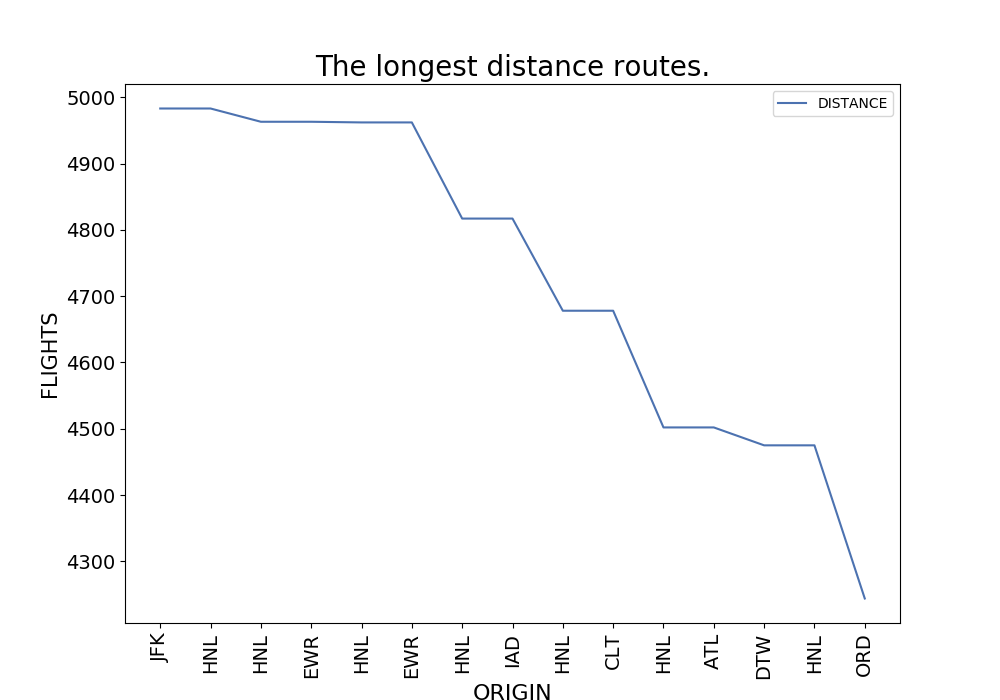

In [105]:
plt.rcParams['figure.figsize'] = [10, 7]
distdf.plot()
plt.title('The longest distance routes.', fontsize=20)
plt.xlabel('ORIGIN', fontsize=16)
plt.ylabel('FLIGHTS', fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
import numpy as np
xpos = np.arange(len(distdf.ORIGIN))
plt.xticks(xpos,distdf['ORIGIN'],rotation = 90)
plt.show();
%matplot plt

## *The Most Common Airports/Most Crowded Airports.

### 1.The most common airports w.r.t arrivals

In [79]:
df_f=df1.select("OP_CARRIER","DEST","ORIGIN")\
        .groupBy('DEST').count()\
        .orderBy('count', ascending=False)\
        .limit(20)
        

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
df_f.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+
|DEST|  count|
+----+-------+
| ATL|3844795|
| ORD|2908690|
| DFW|2481062|
| DEN|2268324|
| LAX|2107552|
| PHX|1702807|
| IAH|1642903|
| SFO|1578926|
| LAS|1460591|
| CLT|1310271|
| DTW|1269857|
| MSP|1242722|
| MCO|1212395|
| BOS|1144255|
| EWR|1140902|
| SLC|1136898|
| SEA|1134518|
| LGA|1033692|
| JFK|1030130|
| BWI| 985342|
+----+-------+

In [81]:
df_fp=df_f.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

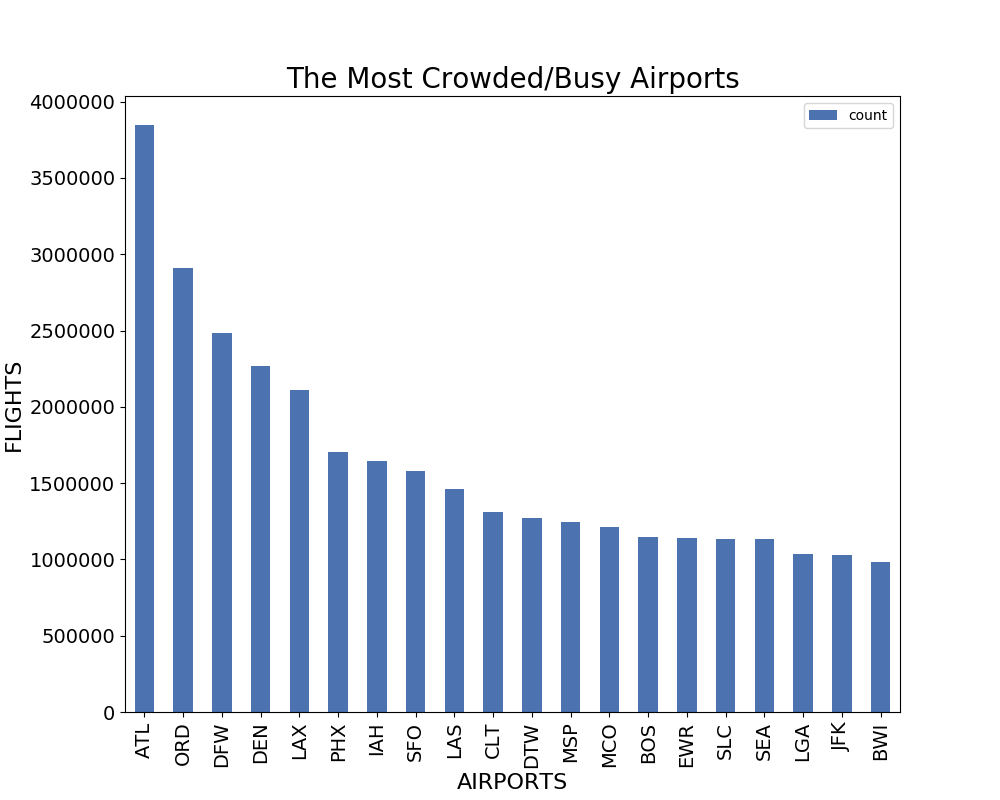

In [98]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
df_fp.plot.bar()
plt.title('The Most Crowded/Busy Airports', fontsize=20)
plt.xlabel('AIRPORTS', fontsize=16)
plt.ylabel('FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
import numpy as np
xpos = np.arange(len(df_fp.DEST))
plt.xticks(xpos,df_fp['DEST'],rotation = 90)
plt.show();
%matplot plt

### 2.The most common airport w.r.t Departures.

In [27]:
df_f=df1.select("OP_CARRIER","DEST","ORIGIN")\
        .groupBy('ORIGIN').count()\
        .orderBy('count', ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-------+
|ORIGIN|  count|
+------+-------+
|   ATL|3849391|
|   ORD|2915085|
|   DFW|2488904|
|   DEN|2271450|
|   LAX|2106537|
|   PHX|1705697|
|   IAH|1645926|
|   SFO|1580093|
|   LAS|1458937|
|   CLT|1312686|
+------+-------+
only showing top 10 rows

# *Number of Flights by Time Period

## 1.Number of Flights by Month

In [28]:

num_of_flights_by_month = df0.groupBy('MONTH').count().orderBy('MONTH')
num_of_flights_by_month.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|MONTH|  count|
+-----+-------+
|    1|4799953|
|    2|4429011|
|    3|5190952|
|    4|5034186|
|    5|5178782|
|    6|5749062|
|    7|4877847|
|    8|5359885|
|    9|5402686|
|   10|4591689|
+-----+-------+
only showing top 10 rows

## 2.Number of Flights by Year

In [29]:
num_of_flights_by_year = df0.groupBy('YEAR').count().orderBy('YEAR')
num_of_flights_by_year.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+
|YEAR|  count|
+----+-------+
|2009|6326976|
|2010|6321388|
|2011|5936209|
|2012|6005379|
|2013|6259310|
|2014|5678378|
|2015|5714008|
|2016|5538145|
|2017|5579410|
|2018|7071817|
+----+-------+

In [85]:
byyear=num_of_flights_by_year.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

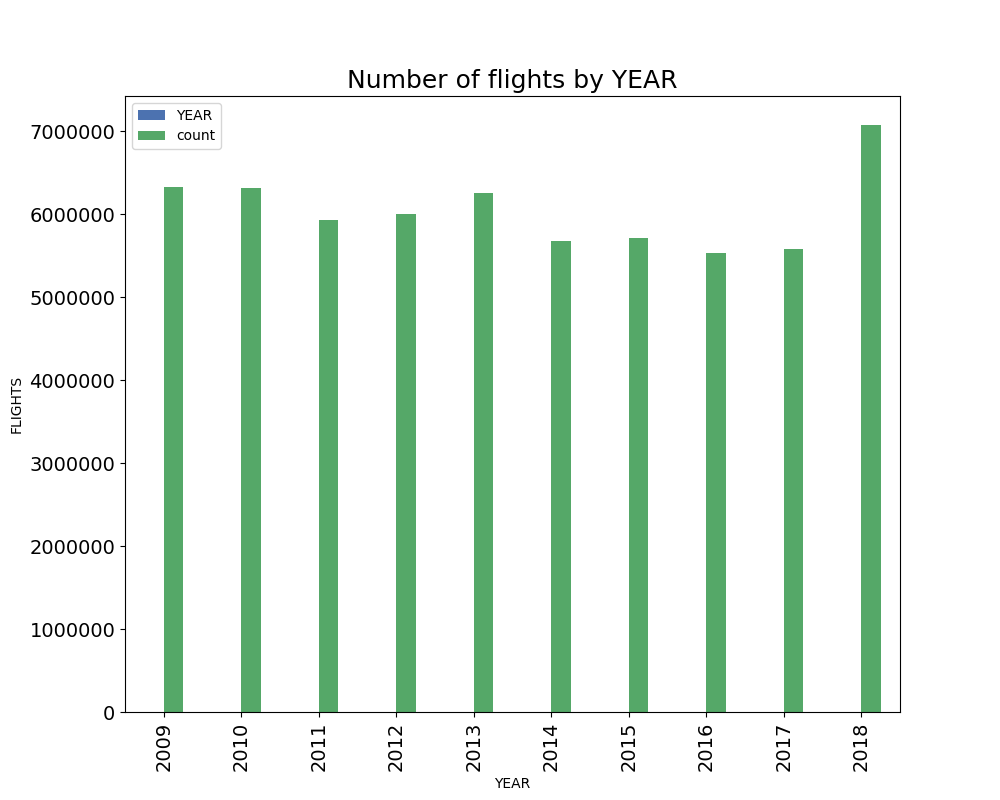

In [97]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('seaborn-deep')
byyear.plot.bar()
plt.title('Number of flights by YEAR', fontsize=18)
plt.xlabel('YEAR', fontsize=10)
plt.ylabel('FLIGHTS', fontsize=10)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
xpos = np.arange(len(byyear.YEAR))
plt.xticks(xpos,byyear['YEAR'],rotation = 90)
plt.show();
%matplot plt

# Total number of flights that were DELAYED,ON TIME,AHEAD OF TIME.

### 1.Total flights that were ahead of time.

In [30]:
ahead_of_time =df.select("ORIGIN","DEST","CRS_DEP_TIME","DEP_TIME","DEP_DELAY").dropna().filter(df.DEP_DELAY<0)
ahead_of_time.show(5)
print("Total flights that were ahead of time are:", ahead_of_time.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----+------------+--------+---------+
|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|
+------+----+------------+--------+---------+
|   BTR| IAH|       930.0|   920.0|    -10.0|
|   IAH| OMA|      1155.0|  1150.0|     -5.0|
|   TUL| IAH|      1700.0|  1655.0|     -5.0|
|   MSN| EWR|       628.0|   619.0|     -9.0|
|   XNA| IAH|      1316.0|  1313.0|     -3.0|
+------+----+------------+--------+---------+
only showing top 5 rows

Total flights that were ahead of time are: 34689744

### 2.Total flights that were delayed.

In [31]:
delay_by_time =df.select("OP_CARRIER_FL_NUM","ORIGIN","DEST","CRS_DEP_TIME","DEP_TIME","DEP_DELAY").dropna().filter(df.DEP_DELAY>0)
delay_by_time.show(5)
print("Total flights that were delayed:",delay_by_time.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------+----+------------+--------+---------+
|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|
+-----------------+------+----+------------+--------+---------+
|             4266|   SAV| ORD|      1715.0|  1401.0|   1246.0|
|             4267|   CLE| BOS|      1340.0|  1420.0|     40.0|
|             4273|   IAH| CRP|       950.0|  1019.0|     29.0|
|             4285|   FSD| ORD|       820.0|   848.0|     28.0|
|             4286|   LRD| IAH|       525.0|   528.0|      3.0|
+-----------------+------+----+------------+--------+---------+
only showing top 5 rows

Total flights that were delayed: 22303553

### 3.Total flights that were on time.

In [32]:
on_time =df.select("OP_CARRIER_FL_NUM","ORIGIN","DEST","CRS_DEP_TIME","DEP_TIME","DEP_DELAY").dropna().filter(df.DEP_DELAY==0)
on_time.show(5)
print("Total flights that were on time:",on_time.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------+----+------------+--------+---------+
|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|
+-----------------+------+----+------------+--------+---------+
|             4270|   IAH| TUL|      1155.0|  1155.0|      0.0|
|             4272|   EWR| DCA|      1230.0|  1230.0|      0.0|
|             4282|   EWR| SBN|      2139.0|  2139.0|      0.0|
|             4302|   LGA| CLE|      1300.0|  1300.0|      0.0|
|             4318|   LIT| ORD|       800.0|   800.0|      0.0|
+-----------------+------+----+------------+--------+---------+
only showing top 5 rows

Total flights that were on time: 3622991

# Determining the longest delay in this dataset
### Max of Departure Delay

In [33]:
from pyspark.sql.functions import col

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------+----+---------+
|        OP_CARRIER|ORIGIN|DEST|DEP_DELAY|
+------------------+------+----+---------+
|  SkyWest Airlines|   CLT| JFK|   2710.0|
| Hawaiian Airlines|   HNL| PPG|   2482.0|
| Hawaiian Airlines|   PPG| HNL|   2468.0|
|Northwest Airlines|   PDX| MSP|   2445.0|
| American Airlines|   LAS| DFW|   2402.0|
| American Airlines|   HNL| LAX|   2208.0|
| American Airlines|   SFO| DFW|   2149.0|
| American Airlines|   BDL| PHL|   2109.0|
|  SkyWest Airlines|   TRI| ATL|   2098.0|
| American Airlines|   SFO| DFW|   2040.0|
+------------------+------+----+---------+
only showing top 10 rows

In [113]:
df_delay = df1.select("OP_CARRIER","ORIGIN","DEST","DEP_DELAY")\
            .where("DEP_DELAY is not null")\
            .sort(col("DEP_DELAY").desc())\
            .limit(15)          

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [114]:
DELDF=df_delay.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

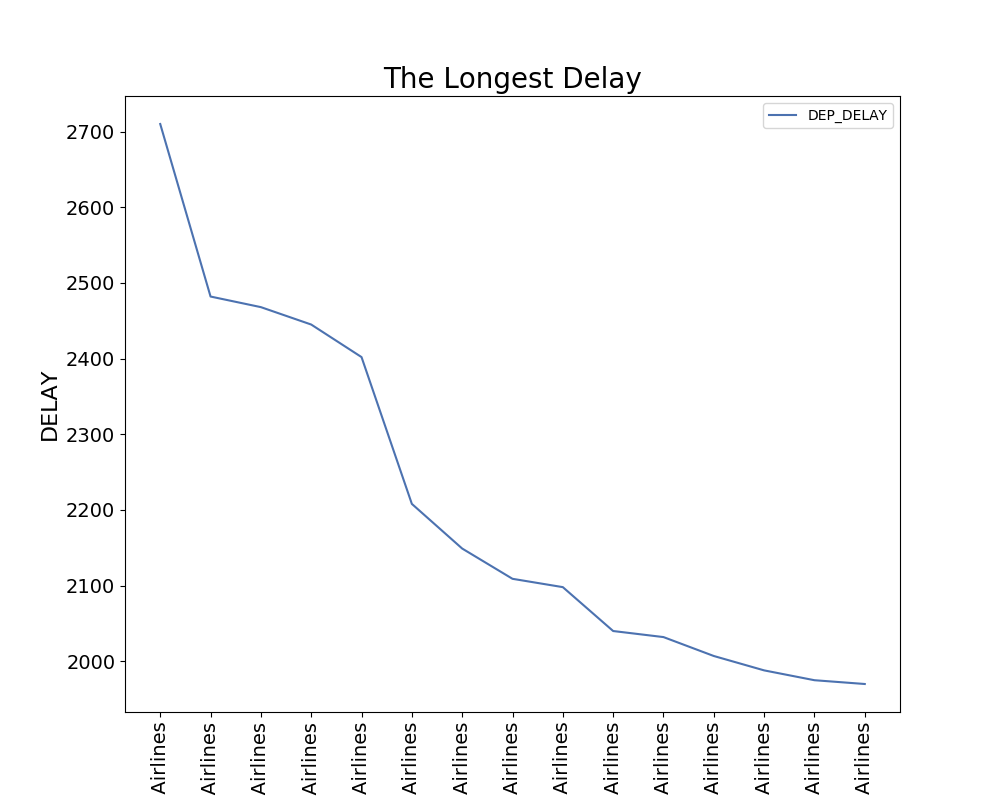

In [135]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('seaborn-deep')
DELDF.plot()
plt.title('The Longest Delay', fontsize=20)
plt.xlabel('OP_CARRIER', fontsize=10)
plt.ylabel('DELAY', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
xpos = np.arange(len(DELDF.OP_CARRIER))
plt.xticks(xpos,DELDF['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

## Top Destinations tends to have Delays.

In [35]:
df_delay = df1.select("DEST","ARR_DELAY")\
        .where("ARR_DELAY > 0")\
        .sort(col("ARR_DELAY").desc())\
        .show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------+
|DEST|ARR_DELAY|
+----+---------+
| JFK|   2692.0|
| PPG|   2475.0|
| HNL|   2454.0|
| MSP|   2449.0|
| DFW|   2444.0|
| LAX|   2189.0|
| PHL|   2153.0|
| DFW|   2142.0|
| ATL|   2108.0|
| DFW|   2028.0|
+----+---------+
only showing top 10 rows

In [117]:
delaydest=df_delay.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

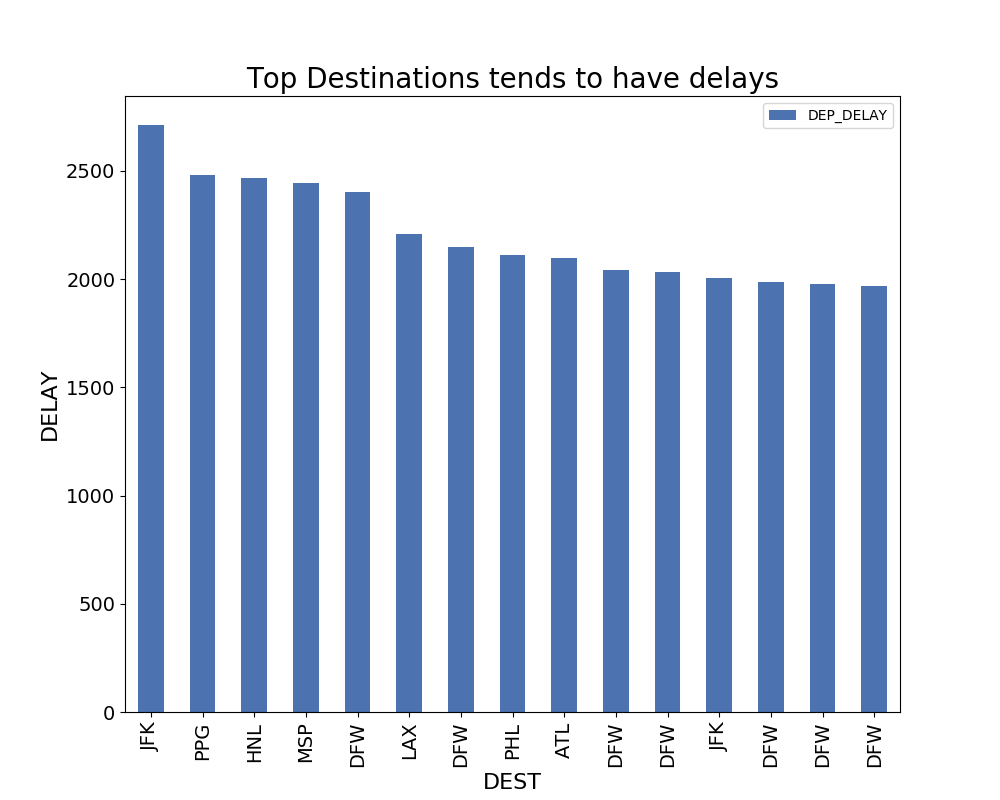

In [120]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('seaborn-deep')
delaydest.plot.bar()
plt.title('Top Destinations tends to have delays', fontsize=20)
plt.xlabel('DEST', fontsize=16)
plt.ylabel('DELAY', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
xpos = np.arange(len(delaydest.DEST))
plt.xticks(xpos,delaydest['DEST'],rotation = 90)
plt.show();
%matplot plt

## Determining the number of Delayed vs. On-time vs.Early flights.

In [36]:
from pyspark.sql.functions import expr
df4 = df1.select(
                      col("OP_CARRIER"),
                      col("ORIGIN").alias("Origin"), 
                      col("DEST").alias("Destination"), 
                      expr("DEP_DELAY"),
                      expr("DEP_DELAY < 1 as Early"),
                      expr("DEP_DELAY == 1 as OnTime"),
                      expr("DEP_DELAY > 1 as Delayed"),
                      expr("ORIGIN = DEST as domestic"))
df4.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+------+-----------+---------+-----+------+-------+--------+
|OP_CARRIER|Origin|Destination|DEP_DELAY|Early|OnTime|Delayed|domestic|
+----------+------+-----------+---------+-----+------+-------+--------+
|ExpressJet|   SAV|        ORD|   1246.0|false| false|   true|   false|
|ExpressJet|   CLE|        BOS|     40.0|false| false|   true|   false|
|ExpressJet|   BTR|        IAH|    -10.0| true| false|  false|   false|
|ExpressJet|   IAH|        OMA|     -5.0| true| false|  false|   false|
|ExpressJet|   IAH|        TUL|      0.0| true| false|  false|   false|
|ExpressJet|   TUL|        IAH|     -5.0| true| false|  false|   false|
|ExpressJet|   EWR|        DCA|      0.0| true| false|  false|   false|
|ExpressJet|   MSN|        EWR|     -9.0| true| false|  false|   false|
|ExpressJet|   IAH|        CRP|     29.0|false| false|   true|   false|
|ExpressJet|   XNA|        IAH|     -3.0| true| false|  false|   false|
+----------+------+-----------+---------+-----+------+-------+--

## AVG NUMBER OF TAKEOFF PER AIRPORT

In [129]:
import pyspark.sql.functions as F 
airportAgg_DF = df0.groupBy("ORIGIN").agg(F.sum("WHEELS_OFF")).limit(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [130]:
airportAgg_DF.show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+---------------+
|ORIGIN|sum(WHEELS_OFF)|
+------+---------------+
|   ACT|          18503|
|   HPN|         145586|
|   AUS|         806828|
|   GCC|          19029|
|   ATW|          56131|
|   TUL|         287528|
|   AMA|          97251|
|   EWR|        2123546|
|   DEN|        4289351|
|   GRI|           6910|
|   IAD|        1141992|
|   MEI|          11922|
|   IPL|           4291|
|   IYK|           5314|
|   EUG|          70832|
+------+---------------+

In [131]:
anotdf=airportAgg_DF.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

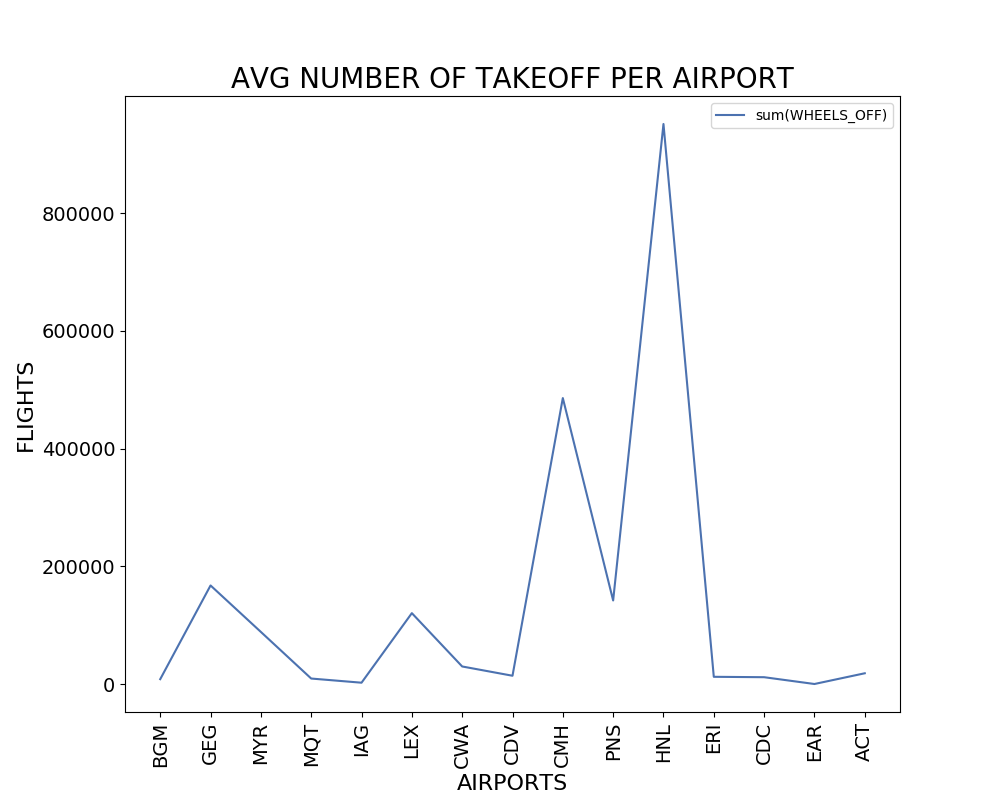

In [134]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('seaborn-deep')
anotdf.plot()
plt.title('AVG NUMBER OF TAKEOFF PER AIRPORT', fontsize=20)
plt.xlabel('AIRPORTS', fontsize=16)
plt.ylabel('FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
xpos = np.arange(len(anotdf.ORIGIN))
plt.xticks(xpos,anotdf['ORIGIN'],rotation = 90)
plt.show();
%matplot plt

## Airport Ranking using Rank & Count the Origin_airport and rank accordingly.

In [39]:
from pyspark.sql.functions import desc
from pyspark.sql import Window
from pyspark.sql.functions import rank

df_r = df0.select("ORIGIN")\
         .groupby("ORIGIN").count().alias('count')\
         .orderBy(desc("count"))\
         
df_rank = df_r.withColumn("rank",rank().over(Window.orderBy(desc("count"))))
df_rank.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-------+----+
|ORIGIN|  count|rank|
+------+-------+----+
|   ATL|3849391|   1|
|   ORD|2915085|   2|
|   DFW|2488904|   3|
|   DEN|2271450|   4|
|   LAX|2106537|   5|
|   PHX|1705697|   6|
|   IAH|1645926|   7|
|   SFO|1580093|   8|
|   LAS|1458937|   9|
|   CLT|1312686|  10|
+------+-------+----+
only showing top 10 rows

## Longest Flight Journey by Air Time.

In [40]:
df_delay = df0.select("DEST","ORIGIN","AIR_TIME")\
        .where("AIR_TIME > 0")\
        .sort(col("AIR_TIME").desc())\
        .show(10)
       

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------+--------+
|DEST|ORIGIN|AIR_TIME|
+----+------+--------+
| HNL|   JFK|   723.0|
| HNL|   EWR|   713.0|
| HNL|   JFK|   712.0|
| HNL|   JFK|   711.0|
| HNL|   JFK|   706.0|
| HNL|   EWR|   706.0|
| HNL|   JFK|   704.0|
| HNL|   JFK|   704.0|
| HNL|   JFK|   703.0|
| HNL|   JFK|   703.0|
+----+------+--------+
only showing top 10 rows